## MNIST_CNN

In [1]:
from tensorflow import keras
import tensorflow as tf

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# csv 파일 불러오기
train_csv = pd.read_csv(f"{os.getcwd()}/data_set/train.csv")
test_csv = pd.read_csv(f"{os.getcwd()}/data_set/test.csv")

In [3]:
train_csv

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# label과 pixel 부분을 나눠주기
y = train_csv.iloc[:, 0].values
x = train_csv.iloc[:, 1:].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
# 흑백으로 바꿔주기
x_train, x_test = x_train / 255, x_test / 255

# 1채널, 28*28 픽셀 형태로 reshaping
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
model = tf.keras.Sequential(
    tf.keras.layers.Conv2D(
        filters=50,
        kernel_size=(3,3),
        padding="same",
        activation="relu",
        input_shape=(28,28,1)
    )
)

for i in range(3):
    model.add(
        tf.keras.layers.Conv2D(
            filters=50,
            kernel_size=(3,3),
            padding="same",
            activation="relu",
        )
    )
    model.add(tf.keras.layers.Dropout(0.33))
    model.add(tf.keras.layers.MaxPooling2D(3,3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=50, kernel_initializer="glorot_normal", activation="relu"))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer="glorot_normal", activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 50)          22550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 50)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 50)          0

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath="model.h5", monitor="val_loss", save_best_only=True)

In [11]:
model.fit(
    x_train, y_train, batch_size=100, epochs=500, verbose=1, validation_data =(x_test,y_test), callbacks=callbacks
)

Epoch 1/500
294/294 [==============================] - 7s 12ms/step - loss: 1.2513 - accuracy: 0.5718 - val_loss: 0.3442 - val_accuracy: 0.9583
Epoch 2/500
294/294 [==============================] - 3s 11ms/step - loss: 0.1881 - accuracy: 0.9403 - val_loss: 0.1959 - val_accuracy: 0.9732
Epoch 3/500
294/294 [==============================] - 3s 11ms/step - loss: 0.1094 - accuracy: 0.9666 - val_loss: 0.1294 - val_accuracy: 0.9820
Epoch 4/500
294/294 [==============================] - 3s 11ms/step - loss: 0.0861 - accuracy: 0.9730 - val_loss: 0.1236 - val_accuracy: 0.9853
Epoch 5/500
294/294 [==============================] - 3s 11ms/step - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.0950 - val_accuracy: 0.9857
Epoch 6/500
294/294 [==============================] - 3s 11ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0964 - val_accuracy: 0.9882
Epoch 7/500
294/294 [==============================] - 3s 11ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.1162 - val_accuracy:

In [12]:
model = tf.keras.models.load_model("model.h5")

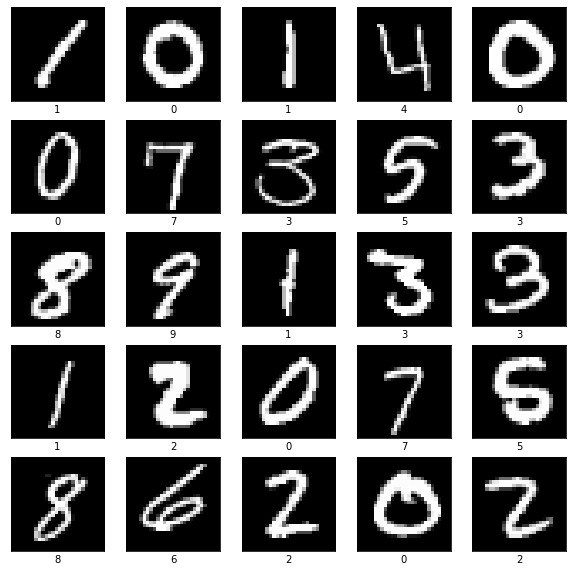

In [13]:
# Train 데이터셋 시각화

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((x.reshape(-1, 28, 28).astype("float32") / 255.0)[i], "gray")
    plt.xlabel(y[i])
plt.show() # 25개 images 시각화

[3.9241989e-08 2.1062364e-07 9.9999595e-01 2.0313987e-06 6.3440537e-09
 2.9168342e-08 6.6969636e-07 3.4625569e-07 6.9559479e-07 5.5278861e-09]


Text(0.5, 1.0, 'Answer : 2')

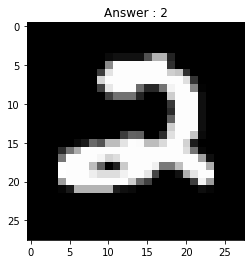

In [14]:
test = test_csv.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0

predictions = model.predict(test)
print(predictions[0])

plt.imshow(test.reshape(-1, 28, 28)[0], "gray")
plt.title(f"Answer : {np.argmax(predictions[0])}")

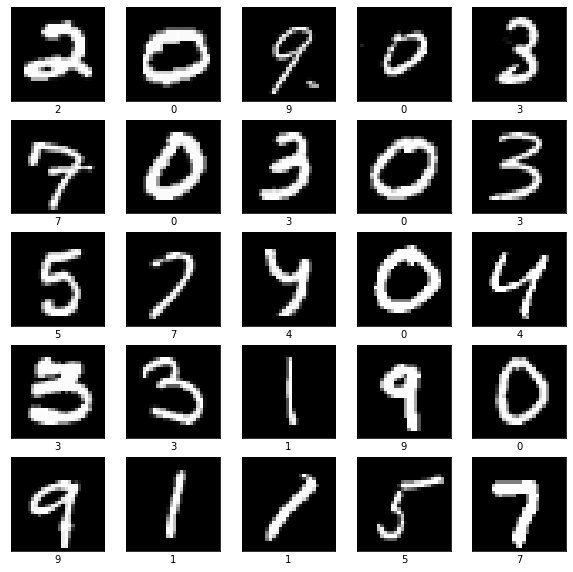

In [15]:
# Test 데이터셋 시각화

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test.reshape(-1, 28, 28)[i], "gray")
    plt.xlabel(np.argmax(predictions[i]))
plt.show() # 25개 images 시각화

In [16]:
len_submission = pd.read_csv(f"{os.getcwd()}/data_set/sample_submission.csv").__len__()
test_label = (np.argmax(predictions[i]) for i in range(predictions.__len__()))
result = pd.DataFrame({"ImageId":np.arange(1, len_submission+1), "Label":pd.Series(test_label)})
display(result)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [17]:
import datetime

time_string = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
result.to_csv(f"submission-{time_string}.csv", index=False)